# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача - установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**Цель исследования:**

1. Определить рыночную стоимость объектов недвижимости.
2. Построить автоматизированную систему, которая отследит аномалии и мошенническую деятельность.
3. Установить, какие факторы влияют на ценообразование стоимости квартир.

**Ход исследования:**

Данные о недвижимости в файле /datasets/real_estate_data.csv.

Моё исследование пройдет в несколько этапов:

- Обзор данных
- Предобработка данных
- Расчет и добавление результатов в таблецу
- Проведение анализа для Ленинградской области
- Проведение анализа для Санкт-Петербурга
- Различаются ли факторы, которые влияют на ценнообразование стоимости квартир
- Написание общего вывода.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Откройте файл с данными и изучите общую информацию

In [2]:
data=pd.read_csv('/datasets/real_estate_data.csv', sep='\t') # откроем файл с данными

In [3]:
data.info() # посмотрим общую информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


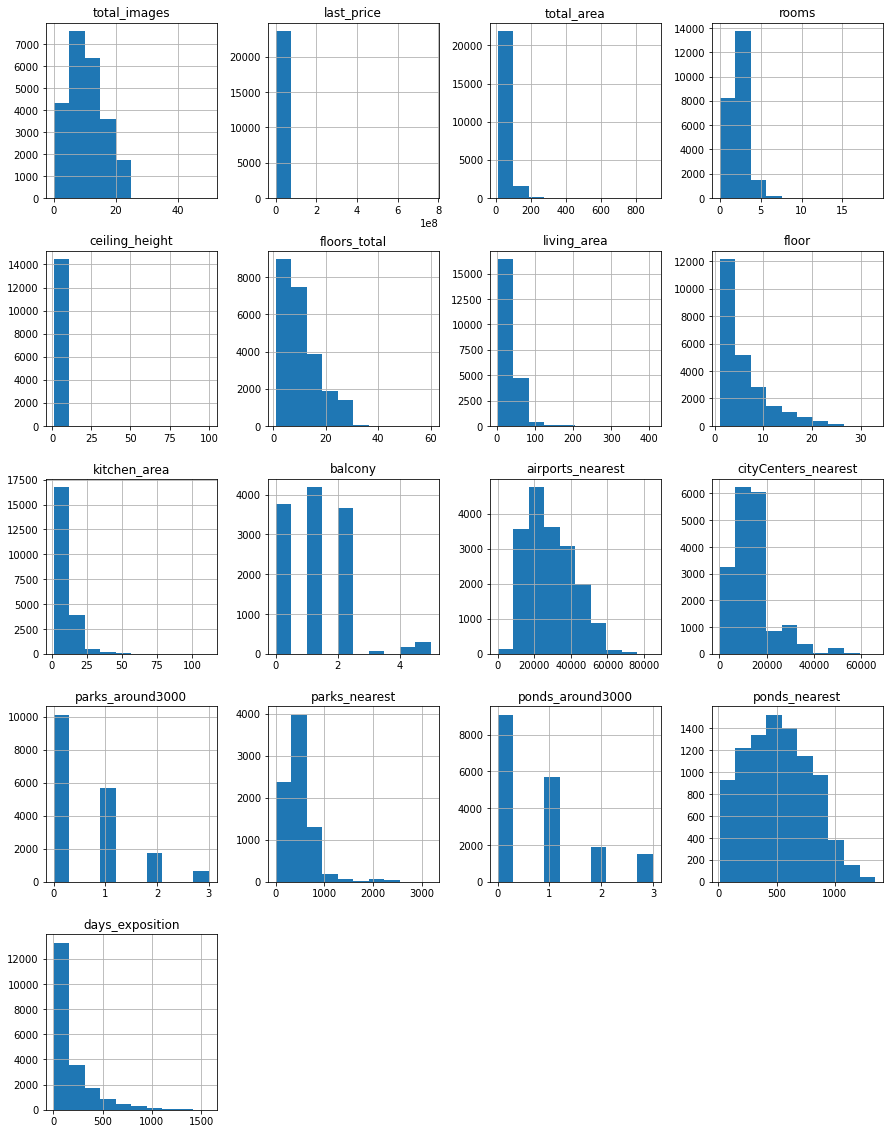

In [5]:
data.hist(figsize=(15, 20)); # построим гистограмммы

**Вывод:**

Открыв файл, мы видим данные, содержащие 23'699 строк и 22 столбца, в которых содержится информация об объявлениях на продажу объектов недвижимости в Санкт-Петербурге и Ленинградской области. Далее мы обработаем данные и выявим зависимости стоимости объекта от таких параметров, как площадь, количество комнат, тип этажа, даты размещения объявления.</div>

### Выполните предобработку данных

#### Обработка и заполнение пропусков

In [6]:
data.isna().sum() # найдем сколько пропусков в каждом столбце

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


In [8]:
# заменяем пропуски в столбце 'ceiling_height' на медианное значение
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [9]:
data = data.dropna(subset=['floors_total']) # удаляем строки с пропущенными этажами в доме, это меньше 0,36% данных (86/23699)

In [10]:
# заменяем пропуски с жилой площадью на медианные значения в зависимости от количества комнат
for t in data['rooms'].unique():
    data.loc[(data['rooms'] == t) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == t), 'living_area'].median()

In [11]:
# в столбце 'is_apartment' заменяем пропуски на False, 
# логично предположить, что там, где пропуски - это жилые помещения, а не апартаменты
data['is_apartment'] = data['is_apartment'].fillna(False)
data.loc[data['is_apartment'] == 'False', 'is_apartment'] = False
data['is_apartment'].value_counts() # проверяем значения в 'is_apartment'

False    23563
True        50
Name: is_apartment, dtype: int64

In [12]:
# в столбце 'balcony' заменяем пропуски на 0, предполагаем, если пропуски - балкона нет
data['balcony'] = data['balcony'].fillna(0)

In [13]:
data.isna().sum() # проверяем оставшееся количество пропусков

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2231
balcony                     0
locality_name              48
airports_nearest         5532
cityCenters_nearest      5509
parks_around3000         5508
parks_nearest           15568
ponds_around3000         5508
ponds_nearest           14552
days_exposition          3172
dtype: int64

**Возможные причины пропусков:**

- сбой в загрузке, не определился район, геолокация (из-за ошибки в написании места), поэтому автоматически не заполнились поля;
- пропуск в ячейке с количеством балконов из-за отсутствия балкона;
- пропуски в апартаментах, так как объекты являются жилой недвижимостью, а не апартаментами; 
- пропуски в столбце площадь кухни скорее всего нет отдельной кухни, совмещенная кухня с гостиной
- пропуск в днях размещения объявления, объявления еще не сняли, объект не продан
- пропуски с расстоянием до ближайших объектов - из-за слишком большой удаленности, не определился район, геолокация, нет рядом пруда, парка, аэропорта

#### Изменение формата данных

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23613 non-null  int64  
 1   last_price            23613 non-null  float64
 2   total_area            23613 non-null  float64
 3   first_day_exposition  23613 non-null  object 
 4   rooms                 23613 non-null  int64  
 5   ceiling_height        23613 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23613 non-null  float64
 8   floor                 23613 non-null  int64  
 9   is_apartment          23613 non-null  bool   
 10  studio                23613 non-null  bool   
 11  open_plan             23613 non-null  bool   
 12  kitchen_area          21382 non-null  float64
 13  balcony               23613 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

In [15]:
# переводим значения 'first_day_exposition' в формат datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [16]:
data['floors_total'] = data['floors_total'].astype(int) # переводим вещественный тип данных на целочисленный

In [17]:
data['balcony'] = data['balcony'].astype(int) # переводим вещественный тип данных на целочисленный

важно перевести в формат даты значения в столбце "дата публикации" для последующей корректной обработки значений

#### Обработка дубликатов

In [18]:
# поиск явных дубликатов
data.duplicated().sum()

0

In [19]:
# поиск неявных дубликатов в столбце населенный пункт
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [20]:
# производим замену типов населенных пунктов на актуальные (некоторые села, деревни стали поселками, городами)
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['городской поселок Павлово', 'село Павлово'], 'поселок городского типа Павлово', regex=True)
                        )

data['locality_name'] = (data['locality_name']
.replace(['поселок Гарболово', 'деревня Зимитицы', 'деревня Калитино', 'деревня Кудрово', 'поселок Любань', 'поселок Мурино', 'село Никольское', 'поселок Рабитицы', 'деревня Щеглово'], 
         ['деревня Гарболово', 'поселок Зимитицы', 'поселок Калитино', 'Кудрово', 'Любань', 'Мурино', 'Никольское', 'деревня Рабитицы', 'поселок Щеглово'])
                        )

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  float64       
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        23613 non-null  float64       
 6   floors_total          23613 non-null  int64         
 7   living_area           23613 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          23613 non-null  bool          
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          21382 non-null  float64       
 13  balcony         

 <b>Вывод:</b> 
 
 Были исправлены форматы исходных данных, в столбцах: количество этажей в доме, количество балконов, дата размещения объявления. Восполнены пропуски медианными значениями в столбцах: высота потолка, жилая площадь в зависимости от количества комнат, обработаны дубликаты в наименовании населенных пунктов, произведена замена на актуальные типы населенных пунктов.</div>

### Добавьте в таблицу новые столбцы

In [22]:
data['price_per_meter'] = data['last_price']/data['total_area'] # добавили столбец с ценой за кв.метр

In [23]:
data['publication_day'] = data['first_day_exposition'].dt.weekday # добавили столбец с днем недели публикации

In [24]:
data['publication_month'] = pd.DatetimeIndex(data['first_day_exposition']).month # добавили столбец с месяцем публикации

In [25]:
data['publication_year'] = pd.DatetimeIndex(data['first_day_exposition']).year # добавили столбец с годом публикации

In [26]:
# добавляем столбец с типом этажа (первый, последний, другой)
data['floor_type'] = data['floor'].where(data['floor'] != data['floors_total'], 'Последний')
data['floor_type'] = data['floor_type'].replace(1, 'Первый')
data['floor_type'] = data['floor_type'].where((data['floor_type'] == 'Первый') | (data['floor_type'] == 'Последний'), 'Другой')

In [27]:
data['cityCenters_nearest_km'] = (data['cityCenters_nearest']/1000).round(0) # добавили столбец с расстоянием до центра в км

In [28]:
data.head() # проверяем новые столбцы

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,publication_day,publication_month,publication_year,floor_type,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,Другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,Первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,Другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,45.0,9,False,...,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,Другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,Другой,8.0


**Вывод:**

Добавлены новые столбцы с ценой за 1кв.метр, днем недели, месяцем, годом публикации, типом этажа, расстояние до центра в км.

### Проведите исследовательский анализ данных

#### Исследование и построение графиков зависимости цены от параметров квартиры

In [29]:
# создадим функцию для построения графиков
def hist_and_box(file, col):
    '''функция для построения гистограммы и ящика, переменные файл и категория'''
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

    # Гистограмма
    sns.histplot(file[col], ax=axes[0], color='#B57EDC')
    axes[0].set_title(f'Гистограмма по "{col}"')
    axes[0].set_ylabel('Частота')
    axes[0].set_xlabel(col)

    # Boxplot
    sns.boxplot(x=file[col], ax=axes[1], color='#B57EDC')
    axes[1].set_title('Boxplot')
    
    plt.tight_layout()
    plt.show()

In [30]:
def bar_and_box(file, col):
    '''функция для построения bar и ящика , переменные файл и категория'''

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
   
    sns.barplot(x=file[col].value_counts().index, y=file[col].value_counts().values, data=file, color='royalblue', ax=axes[0])
    axes[0].set_title(f'График Bar по {col}')
    axes[0].set_ylabel('Частота')
    axes[0].set_xlabel(col)
    
    # Boxplot
    sns.boxplot(x=file[col], ax=axes[1], color='royalblue')
    axes[1].set_title('Boxplot')
    
    plt.tight_layout()
    plt.show()

In [31]:
def diagram_pie(file, column):
    '''для построения круговой диаграммы категориальных признаков в файле'''
    
    plt.figure(figsize=(6, 4))
    
    # Построение круговой диаграммы
    file[column].value_counts().plot(
        kind='pie',
        colors=sns.color_palette('pastel')[0:len(file[column].unique())],
        autopct="%.1f%%",
        ylabel="",
        textprops={'fontsize': 12}
    )
    
    plt.title(f'Соотношение по: "{column}"', fontsize=16)
    plt.tight_layout()
    plt.show()

##### Столбец общая площадь (total_area)

In [32]:
data['total_area'].describe()

count    23613.000000
mean        60.340678
std         35.648988
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

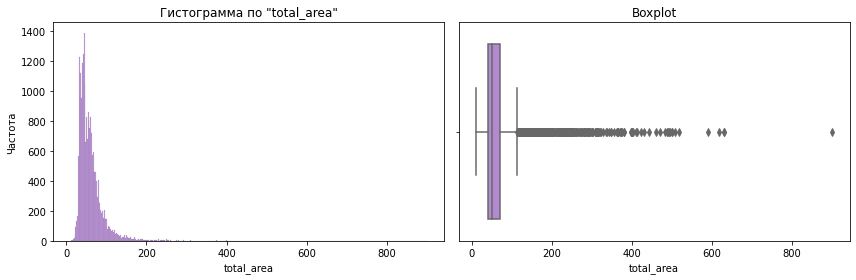

In [33]:
hist_and_box(data, 'total_area')

- распределение близко к нормальному, есть перекос влево, засчет большого количества маленьких площадей, среднее значение 60,34, основная часть в диапазоне 40 - 69,8 кв.м; на boxplot заметны выбросы от 110 до 900кв.м.

In [34]:
# удаляем наиболее большие выбросы, более 400 кв.м, это 0,05% данных(121/23613)
data = data[data['total_area'] < 400]
data.shape[0]

23587

##### Столбец жилая площадь (living_area)

In [35]:
data['living_area'].describe()

count    23587.000000
mean        34.120413
std         20.471327
min          2.000000
25%         18.400000
50%         30.300000
75%         42.600000
max        264.500000
Name: living_area, dtype: float64

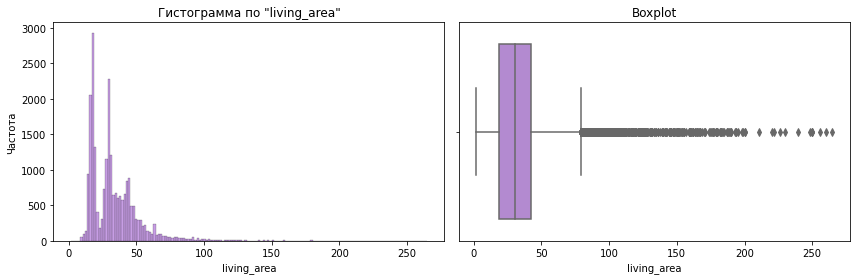

In [36]:
hist_and_box(data, 'living_area')

- распределение близко к нормальному, есть перекос влево, засчет большого количества маленьких площадей, среднее значение 34, основная часть в диапазоне 18,4 - 42,6 кв.м; на boxplot заметны выбросы от 75 до 264,5кв.м.

In [37]:
# посмотрим первые строчки с самыми маленькими значениями жилой площади
data.sort_values(by='living_area')[['rooms', 'living_area', 'total_area', 'kitchen_area']].head(10)

,rooms,living_area,total_area,kitchen_area
21758,0,2.0,23.0,NaN
13915,2,2.0,52.0,9.0
3242,1,3.0,41.0,11.0
23574,3,3.0,139.0,16.0
17582,0,5.0,22.0,NaN
21943,4,5.4,77.6,9.8
16431,1,6.0,31.0,17.0
19251,1,6.5,33.0,18.0
20994,2,8.0,50.6,31.0
23208,1,8.0,37.0,22.0


In [38]:
data = data[data['living_area'] > 5] # удаляем явные аномалии с жилой площадью меньше 5м

##### Столбец площадь кухни (kitchen_area)

In [39]:
data['kitchen_area'].describe()

count    21358.00000
mean        10.52984
std          5.75478
min          1.30000
25%          7.00000
50%          9.10000
75%         12.00000
max        107.00000
Name: kitchen_area, dtype: float64

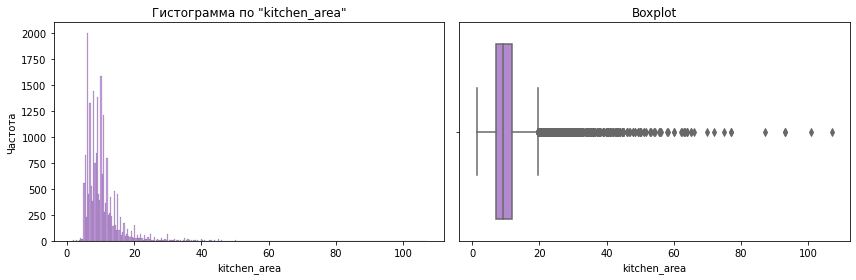

In [40]:
hist_and_box(data, 'kitchen_area')

- распределение близко к нормальному, с точечными всплесками, смещено влево засчет большого количества маленьких площадей, среднее значение 10,5, основная часть в диапазоне 7 - 12 кв.м; на boxplot заметны выбросы от 20 до 107кв.м.

##### Столбец цена объекта (last_price)

In [41]:
data['last_price'].describe()

count    2.358200e+04
mean     6.383748e+06
std      8.213478e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.633500e+06
75%      6.757042e+06
max      3.300000e+08
Name: last_price, dtype: float64

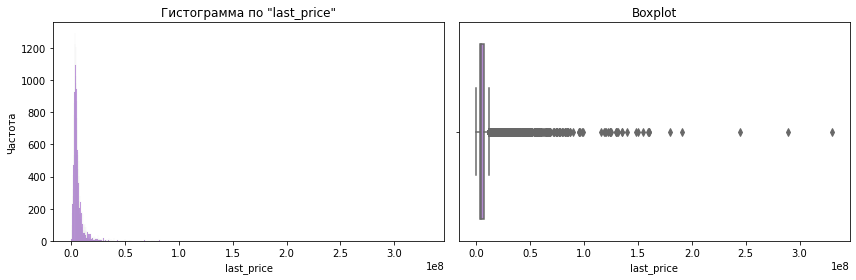

In [42]:
hist_and_box(data, 'last_price')

- распределение близко к нормальному, смещено сильно влево засчет большого количества высоких цен, среднее значение 6,38млн., основная часть в диапазоне 3,4 - 6,75 млн.; на boxplot заметны выбросы до 330млн.

In [43]:
# сортируем строки по возрастанию стоимости квартир, для выявления аномалий и изучения самых низких цен
data.sort_values(by='last_price')[['last_price', 'rooms', 'living_area', 'total_area', 'locality_name']].head() 

,last_price,rooms,living_area,total_area,locality_name
8793,12190.0,2,32.0,109.0,Санкт-Петербург
17456,430000.0,1,16.0,30.4,Сланцы
14911,430000.0,2,30.5,54.0,поселок станции Свирь
16274,440000.0,1,17.6,40.0,деревня Старополье
5698,450000.0,2,23.0,42.0,городской поселок Будогощь


*Заметна аномалия в стоимости 2-хкомнатной квартиры 12'190руб. строчка 8793, площадь квартиры 109 кв.м*

Отфильтруем 2-хкомнатные квартиры с площадью от 100 до 120кв.м и узнаем медианную стоимость похожих квартир.

In [44]:
data.query('rooms == 2 & 100 < total_area < 120')['last_price'].median() 

16300000.0

Получается похожие квартиры стоят 16 млн.руб.

In [45]:
data.loc[8793, 'last_price'] = data.loc[8793, 'last_price']*100 # приводим в соответствие стоимость квартиры в 8793 строке

In [46]:
data.sort_values(by='last_price').tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,publication_day,publication_month,publication_year,floor_type,cityCenters_nearest_km
19865,20,180000000.0,347.0,2015-01-21,8,3.90,6,260.0,3,False,...,537.0,3.0,501.0,834.0,5.187320e+05,2,1,2015,Другой,4.0
8900,13,190870000.0,268.0,2016-03-25,3,2.65,8,132.0,7,False,...,NaN,2.0,198.0,901.0,7.122015e+05,4,3,2016,Другой,5.0
16461,17,245000000.0,285.7,2017-04-10,6,3.35,7,182.8,4,False,...,400.0,3.0,140.0,249.0,8.575429e+05,0,4,2017,Другой,6.0
22831,18,289238400.0,187.5,2019-03-19,2,3.37,6,63.7,6,False,...,386.0,3.0,188.0,NaN,1.542605e+06,1,3,2019,Последний,1.0
1436,19,330000000.0,190.0,2018-04-04,3,3.50,7,95.0,5,False,...,519.0,3.0,285.0,233.0,1.736842e+06,2,4,2018,Другой,1.0


Средняя стоимость объекта 6,4 млн.руб, медианная стоимость 4,6 млн.руб., разница из-за нескольких выбросов стоимости объектов с большой площадью и расположенных в центре города.

Самая низкая стоимость объектов 430тыс.руб. расположенных на 1/последних этажах, в деревнях и поселках.

##### Столбец количество комнат (rooms)

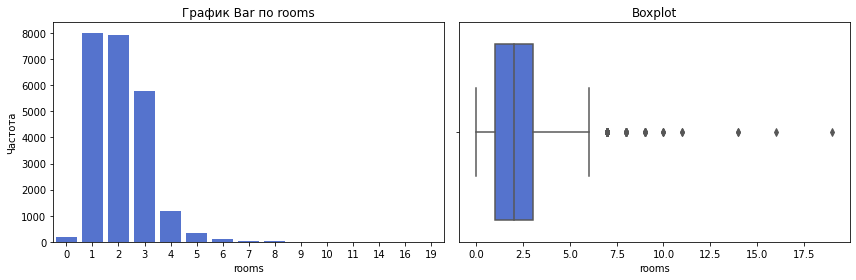

In [47]:
bar_and_box(data, 'rooms') # построим barplot и boxplot через функцию

распределение количества комнат от 0 до 19, в среднем 2 и 3 комнаты, основная часть в диапазоне от 1 до 4 комнат; на boxplot есть выбросы от 6 комнат.

In [48]:
data.sort_values(by='rooms').head() # выводим на экран '0-комнатные' квартиры, и видим, что площади указаны как у 1-комнатных

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,publication_day,publication_month,publication_year,floor_type,cityCenters_nearest_km
1625,7,1980000.0,23.98,2018-02-01,0,2.65,4,10.5,3,False,...,NaN,NaN,NaN,120.0,82568.807339,3,2,2018,Другой,NaN
19917,5,2340000.0,25.41,2017-09-29,0,2.65,25,18.5,13,False,...,NaN,NaN,NaN,3.0,92089.728453,4,9,2017,Другой,NaN
17626,12,3150000.0,22.00,2017-05-20,0,2.65,16,15.0,14,False,...,38.0,1.0,851.0,515.0,143181.818182,5,5,2017,Другой,14.0
22573,8,2250000.0,24.00,2017-09-28,0,2.65,12,15.0,3,False,...,NaN,NaN,NaN,45.0,93750.000000,3,9,2017,Другой,NaN
9579,9,3450000.0,24.80,2019-02-01,0,2.68,35,16.0,17,False,...,NaN,3.0,80.0,45.0,139112.903226,4,2,2019,Другой,20.0


In [49]:
data['rooms'] = data['rooms'].replace(0, 1) # нулевые значения в столбце 'rooms', заменяем на 1 комнату

В основном объекты представлены от 1 до 3 комнат, что составляет 92% всех объектов, (8013 + 7912 + 5794) / 23582

и всего 5% составляют 4-хкомнатные объекты (1174 /23582), остальные 3% это от 5 до 19 комнатные объекты

##### Столбец высота потолка (ceiling_height)

In [50]:
data['ceiling_height'].describe()

count    23582.000000
mean         2.724074
std          0.990423
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

- распределение близко к нормальному, смещено сильно влево засчет большого количества высоких цен, среднее значение 6,38млн., основная часть в диапазоне 3,4 - 6,75 млн.; на boxplot заметны выбросы до 330млн.

In [51]:
data[data['ceiling_height'] >= 20]['ceiling_height'].value_counts() # выводим данные больше 20м и выброс 100м

27.0     8
25.0     7
32.0     2
20.0     1
24.0     1
27.5     1
22.6     1
26.0     1
100.0    1
Name: ceiling_height, dtype: int64

потолки в диапозоне от 20м до 32м явно неверный формат и имелся ввиду 2,0м - 3,2м, квартира с высотой 100м явно аномалия, удалим эту строку

In [52]:
data = data[(data['ceiling_height'] != 100)] # удаляем строку с высотой потолка 100м

In [53]:
# выделяем значения больше 20м и делим на 10
data['ceiling_height'] = data['ceiling_height'].apply(lambda x: x / 10 if x >= 20 else x)

In [54]:
data[(data['ceiling_height'] < 2) | (data['ceiling_height'] > 5)]['ceiling_height'].value_counts()

8.00     3
5.30     2
14.00    1
1.75     1
10.30    1
5.50     1
5.20     1
5.80     1
5.60     1
8.30     1
6.00     1
1.20     1
1.00     1
Name: ceiling_height, dtype: int64

In [55]:
# удаляем строки с высотой потолка меньше 2м и больше 5м
data = data[(data['ceiling_height'] <= 5) & (data['ceiling_height'] >= 2)]

In [56]:
data['ceiling_height'].describe() # смотрим, что получилось

count    23565.000000
mean         2.695620
std          0.214729
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.000000
Name: ceiling_height, dtype: float64

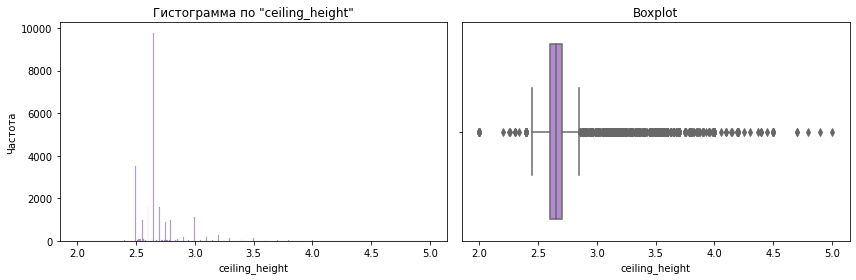

In [57]:
hist_and_box(data, 'ceiling_height')

средняя высота потолка 2,7м, меданная - 2,65м. Большая часть в диапазоне 2,6 - 2,7м. Самый низкий потолок 2м (возможно чердак, подвал), самый высокий 5м. На boxplot заметны выбросы меньше 2,4 и больше 2,8м, до 5м.

##### Столбец тип этажа (floor_type)

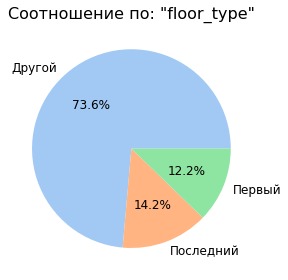

In [58]:
diagram_pie(data, 'floor_type')

наиболее распространен 'другой' тип этажа (не первый и не последний) - 73.6%, остальные 26,4% объектов расположены на последнем (14,2%) и первом этаже(12,2%).

##### Столбец всего этажей (floors_total)

In [59]:
data['floors_total'].describe()

count    23565.000000
mean        10.675833
std          6.595725
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

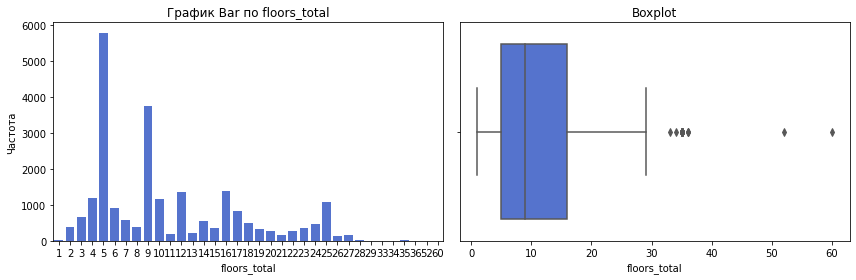

In [60]:
bar_and_box(data, 'floors_total') # построим barplot и boxplot через функцию

большинство объектов находятся в 5 и 9 этажных зданиях, наибольшее количество в диапазоне от 5 до 16 этажей. Также распространены объекты в зданиях в 4, 10, 12, 16, 25 этажей. На boxplot заметны выбросы от 29 до 60 этажные здания.

##### Столбец расстояние до центра города, Санкт-Петерубрга (cityCenters_nearest)

In [61]:
data['cityCenters_nearest'].describe()

count    18060.000000
mean     14200.607973
std       8614.840375
min        181.000000
25%       9241.000000
50%      13105.000000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

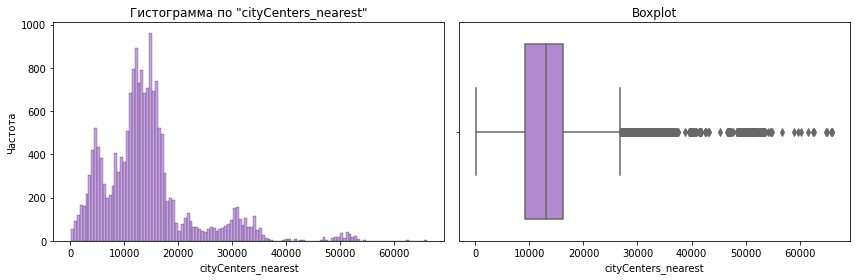

In [62]:
hist_and_box(data, 'cityCenters_nearest')

Распределие расстояния биномиальное, два пика в 5км и 14км, в среднем расстояние до центра города 14км, меданная - 13км. Большая часть в диапазоне 9 - 16км. На boxplot заметны выбросы больше 26км до 66км.

##### Столбец расстояние до ближайшего парка (parks_nearest)

In [63]:
data['parks_nearest'].describe()

count    8017.000000
mean      490.727579
std       341.644827
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

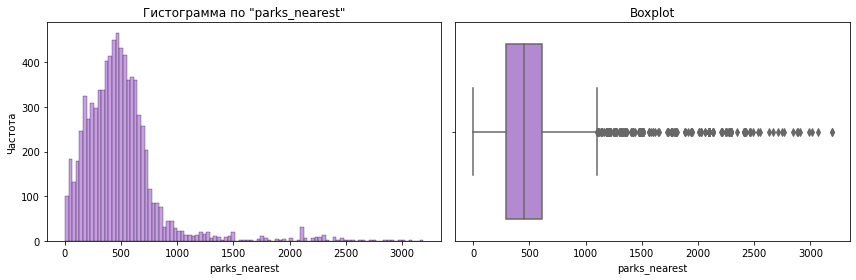

In [64]:
hist_and_box(data, 'parks_nearest')

Распределие расстояния нормальное, в среднем расстояние до ближайшего парка 490м, меданное - 455м. Большая часть в диапазоне 288 - 612м. На boxplot заметны выбросы больше 1,1км до 3,19км.

#### Изучение продажи квартиры (столбец days_exposition)

In [65]:
data['days_exposition'].describe()

count    20402.000000
mean       180.841486
std        219.675938
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

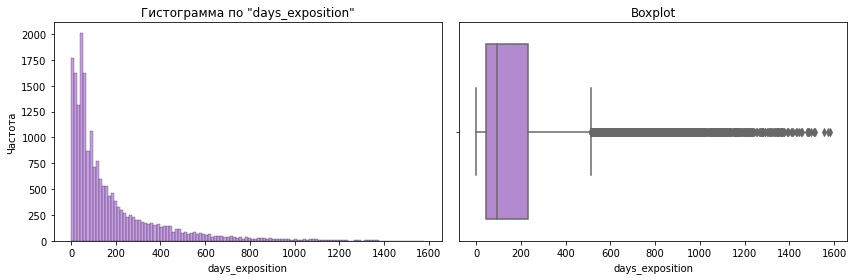

In [66]:
hist_and_box(data, 'days_exposition')

Как показывают данные, в среднем объекты продаются около 6 месяцев (180дн.) со дня размещения объявления. Большая часть продается от 45 до 232 дней.

Медианное значение 95 дней, т.е. большинство квартир продаются за 3 месяца.

***'Долгие'*** продажи квартир дляться более 500 дней.

***'Быстрые'*** продажи квартир дляться менее 45 дней.


#### Изучение факторов больше всего влияющих на общую (полную) стоимость объекта

In [67]:
# создадим функцию для построения графиков, зависимости параметров от полной стоимости
def gr_plot(column):
    data_pivot = data.pivot_table(index=column, values='last_price', aggfunc='median')
    data_pivot.plot(grid=True, figsize=(8, 5), title=f'Зависимость цены от {column}')

##### Столбец общая площадь, изучение фактора влияющего на стоимость объекта

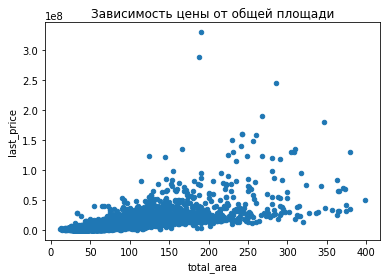

In [68]:
data.plot(x='total_area', y='last_price', kind='scatter', title='Зависимость цены от общей площади');

In [69]:
data['total_area'].corr(data['last_price']) # найдем коэффициент корреляции Пирсона

0.6866855974801508

Прослеживается прямая зависимость общей площади от цены объекта, т.е. чем больше площадь объекта, тем больше цена и это подтверждает коэффициент корреляции Пирсона.

##### Столбец жилая площадь, изучение фактора влияющего на стоимость объекта

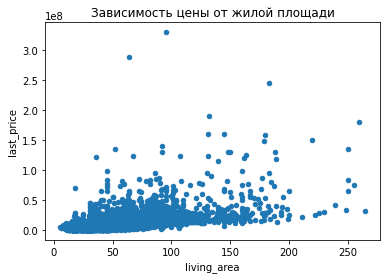

In [70]:
data.plot(x='living_area', y='last_price', kind='scatter', title='Зависимость цены от жилой площади');

In [71]:
data['living_area'].corr(data['last_price']) # найдем коэффициент корреляции Пирсона

0.5872913914586847

Прослеживается небольшая прямая зависимость, чем больше жилая площадь, тем выше цена объекта, что также подтвержается значением коэффициента Пирсона.

##### Столбец площадь кухни, изучение фактора влияющего на стоимость объекта

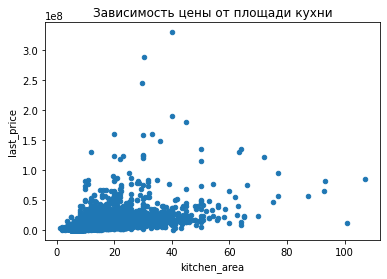

In [72]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', title='Зависимость цены от площади кухни');

In [73]:
data['kitchen_area'].corr(data['last_price']) # найдем коэффициент корреляции Пирсона

0.527794646509801

прослеживается совсем небольшая прямая зависимость, чем больше площадь кухни, тем выше цена объекта

##### Столбец количество комнат, изучение фактора влияющего на стоимость объекта

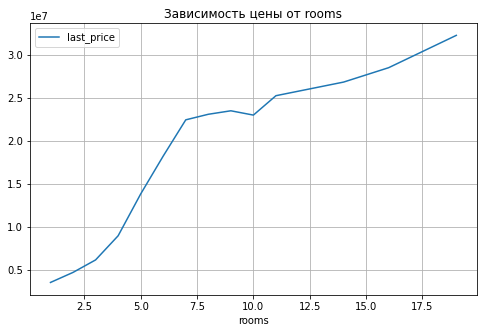

In [74]:
gr_plot('rooms')

In [75]:
data['rooms'].corr(data['last_price']) # найдем коэффициент корреляции Пирсона

0.40282621758372966

очевидна прямая зависимость что чем больше комнат, тем выше цена объекта, например средняя стоимость 1 комнатной квартиры около 430 тыс.руб, 3 комнатной в 1,5 раза больше - 600 тыс.руб. 

##### Столбец тип этажа, изучение фактора влияющего на стоимость объекта

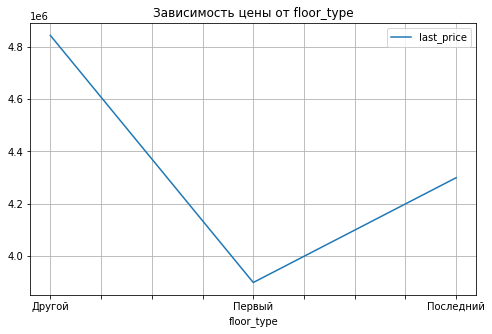

In [76]:
gr_plot('floor_type')

по графику можно сделать вывод, что стоимость объектов расположенных на 1-м этаже самая низкая, почти на 20% (3.9/4.8);

чуть выше стоимость на последнем этаже, самая высокая стоимость объектов, расположенных на 'других' этажах

##### Столбец дата размещения объявления, изучение фактора влияющего на стоимость объекта

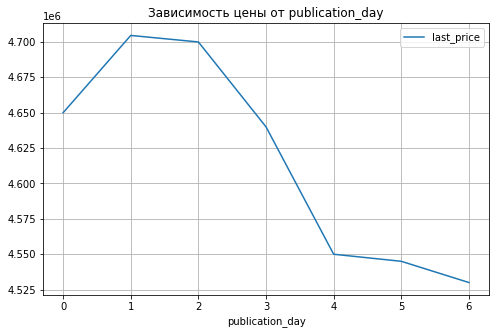

In [77]:
gr_plot('publication_day')

самая высокая стоимость объекта - во вторник и среду

самая низкая стоимость объектов была указана в пятницу, субботу, воскресенье, почти на 5% (4,5/4,7) ниже, чем во вторник и среду.

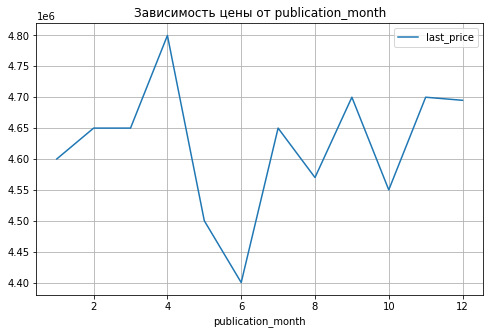

In [78]:
gr_plot('publication_month')

самые высокие цены объектов указаны в месяцы - апрель, сентябрь, ноябрь, декабрь;

самые низкие цены в мае и июне, на 6,5% (4,4/4,7) ниже.

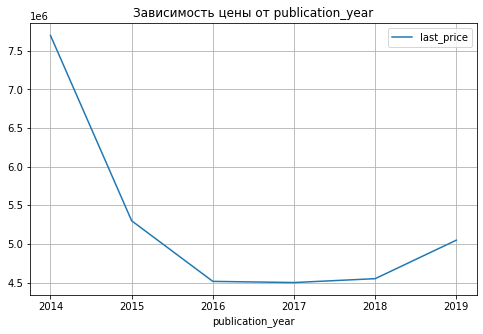

In [79]:
gr_plot('publication_year')

как видно из графика, самые высокие цены были в 2014 году, в 2015 году начался резкий спад, на 42% (4.5/7.7)

с 2016 по 2018 годы были самые низкие цены, в 2019 заметен подъем на 10% (4.5/5).

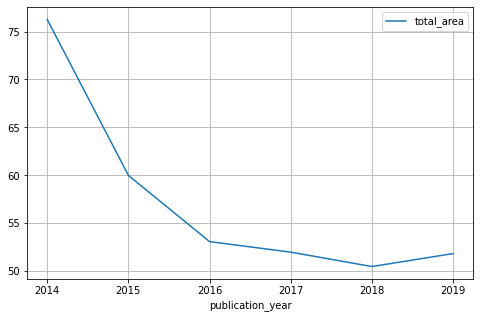

In [80]:
# построим график зависимости площади объекта от года размещения объявления 
pivot_area = data.pivot_table(index='publication_year', values='total_area', aggfunc='median')
pivot_area.plot(grid=True, figsize=(8, 5));

как видно проследние два графика повторяют динамику, т.е. после 2015 года снизилась не столько стоимость объектов недвижимости, сколько площадь объектов недвижимости, скорее это связано с увеличением продажи квартир в новостройках, где площадь меньше, также возможен повышенный спрос на более бюджетные квартиры (однокомнатные) молодыми людьми.

#### Расчет средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [81]:
# строим сводную таблицу самых частых объявлений, где будет указано количество объявлений, ср.значение цены за 1кв.м
data_pivot_10 = data.pivot_table(index='locality_name', values='price_per_meter', aggfunc=['count', 'median'])
data_pivot_10.columns = ['count', 'price_per_meter_mean']
data_pivot_10.sort_values(by='count', ascending=False).head(10)

,count,price_per_meter_mean
locality_name,,
Санкт-Петербург,15607,104750.000000
Мурино,585,86231.884058
Кудрово,470,95555.311677
поселок Шушары,439,76829.268293
Всеволожск,398,65789.473684
Пушкин,369,100000.000000
Колпино,338,74723.748474
поселок Парголово,327,91642.857143
Гатчина,307,67796.610169


как показывают данные, среди 10 самых популярных городов с объявлениями, самая высокая ср.стоимость за метр в Санкт-Петербурге, самая низкая в Выборге

#### Зависимость стоимости объекта от расстояния до центра города

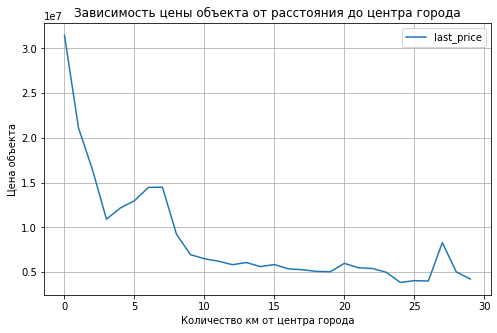

In [82]:
data_sp = data[data['locality_name'] == 'Санкт-Петербург']
data_sp = data_sp.pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='mean')
data_sp.plot(grid=True, figsize=(8, 5))
plt.title('Зависимость цены объекта от расстояния до центра города')
plt.ylabel('Цена объекта')
plt.xlabel('Количество км от центра города');

прослеживается тенденция, чем ближе к центру находится объект, тем дороже стоимость объекта

в центре Санкт-Петербурга стоимость объектов 30 млн., в 5км уже 12,5млн, в 10км - 8млн.

### Напишите общий вывод

Обработав данные, восполнив пропуски, скорректировав формат данных и наименований пунктов расположения обьектов, выделили несколько категорий для выявления зависимости от стоимости объекта. По каждой категории был сделан анализ.

Выявлены зависимости стоимости объекта от следующих параметров:
- чем больше площадь объекта (общая, жилая, кухни), тем выше стоимость;
- чем больше комнат, тем выше стоимость;
- важен также тип этажа, выше стоимость у объектов, расположенных НЕ на 1-м и НЕ на последнем этажах, стоимость объектов на "других" этажах почти на 20% выше, чем стоимость объектов на 1-м этаже;
- стоимость объектов во вторник и среду самые высокие, самые низкие в пятницу, субботу, воскресенье, почти на 5% (4,5/4,7) ниже;
- самые высокие стоимости объектов указаны в месяцы - апрель, сентябрь, ноябрь, декабрь; самые низкие цены в мае и июне, на 6,5% (4,4/4,7) ниже.
- обнаружено, что после 2015 года снизилась не столько стоимость объектов недвижимости, сколько площадь объектов недвижимости, скорее это связано с увеличением продажи квартир в новостройках, где площадь меньше, также возможен повышенный спрос на более бюджетные квартиры (однокомнатные) молодыми людьми.

Рекомендуется обратить внимание, что в данных нет таких параметров как: тип ремонта (евроремонт, косметический, дизайнерский, без ремонта), год постройки здания, тип жилья (новостройка, вторичка), тип дома (панельный, кирпичный, блочный, деревянный), тип объекта (комната, квартира, дом). Эти параметры также влиют на стоимость объектов недвижимости.